<a href="https://colab.research.google.com/github/Koallla/Data-Science/blob/hw3/Hw3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import seaborn as sns

url = 'https://docs.google.com/spreadsheets/d/1jOjukFoW306uv53FY6R79NcwQy5S4TZ9nprzRmBSHOs/export?format=csv&gid=271672803'


def del_col_with_null(df_data):
    for col in df_data:
        if df_data[col].isnull().sum() and col != 'Язык.программирования':
            df_data.drop(col, axis=1, inplace=True)


def fill_avg_salary(df_data):
    return df_data.mean()


df = pd.read_csv(url)

In [ ]:
df.head()

In [23]:
df.shape

(8704, 25)

In [ ]:
df.dtypes

In [ ]:
df.isnull().sum()

In [34]:
del_col_with_null(df)
df = df.dropna()
df.shape
df.keys()


Index(['N', 'Должность', 'Язык.программирования', 'Общий.опыт.работы',
       'Опыт.работы.на.текущем.месте', 'Зарплата.в.месяц',
       'Изменение.зарплаты.за.12.месяцев', 'Город', 'Размер.компании',
       'Тип.компании', 'Пол', 'Возраст', 'Образование', 'Еще.студент',
       'Уровень.английского', 'Дата.заполнения', 'User.Agent', 'exp',
       'current_job_exp', 'salary'],
      dtype='object')

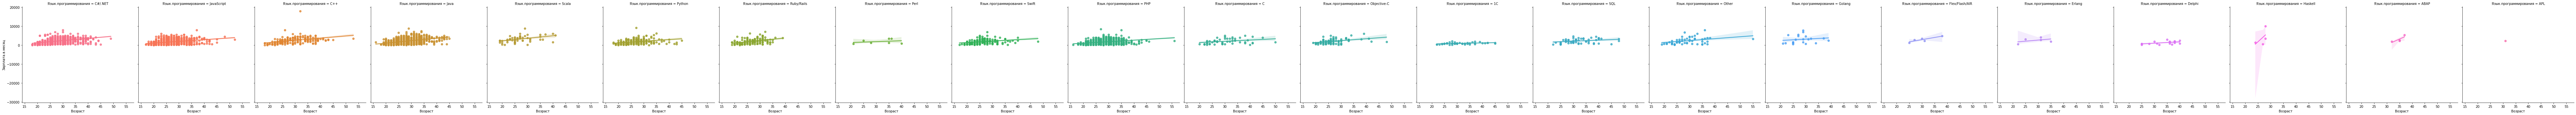

In [72]:
sns.lmplot(x='Возраст', y='Зарплата.в.месяц', hue="Язык.программирования", col="Язык.программирования", data=df)

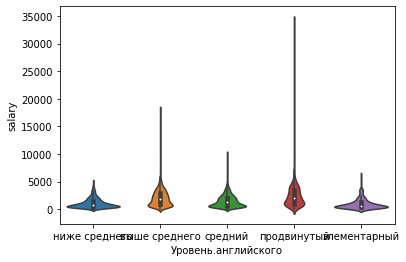

In [74]:
sns.violinplot(x='Уровень.английского', y='salary', data=df)

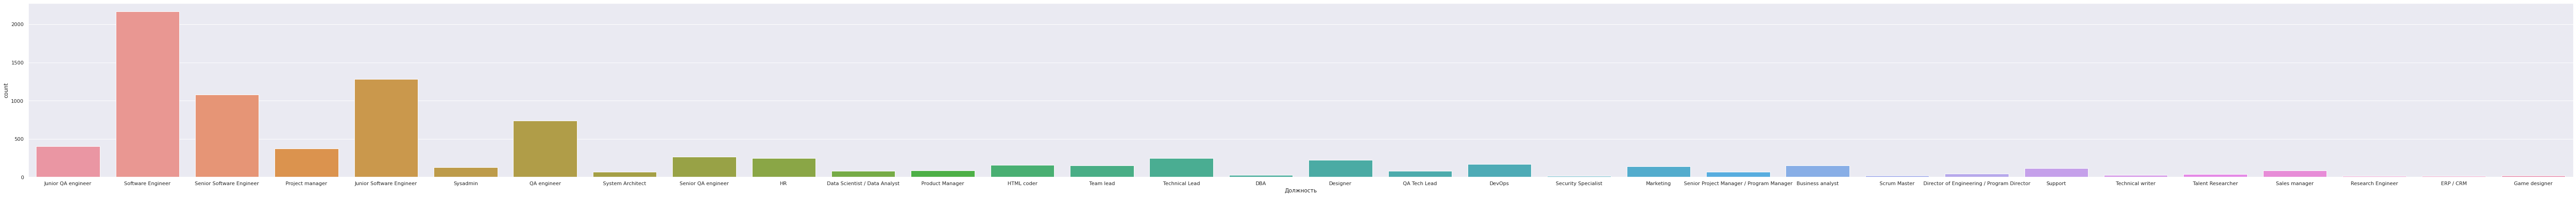

In [80]:
sns.set(rc={'figure.figsize':(100,7)})
sns.countplot(x='Должность', data=df)

In [27]:
python_data = df[df['Язык.программирования'] == 'Python']
python_data.shape
min_max_salary = python_data.groupby(by='Должность').agg(salary_min = ('Зарплата.в.месяц', 'min'), salary_max = ('Зарплата.в.месяц', 'max'))
min_max_salary['avg'] = min_max_salary.apply(fill_avg_salary, axis=1)
desc_avg = min_max_salary['avg'].describe()
desc_avg.to_csv('data_salary.csv')

# Новый раздел